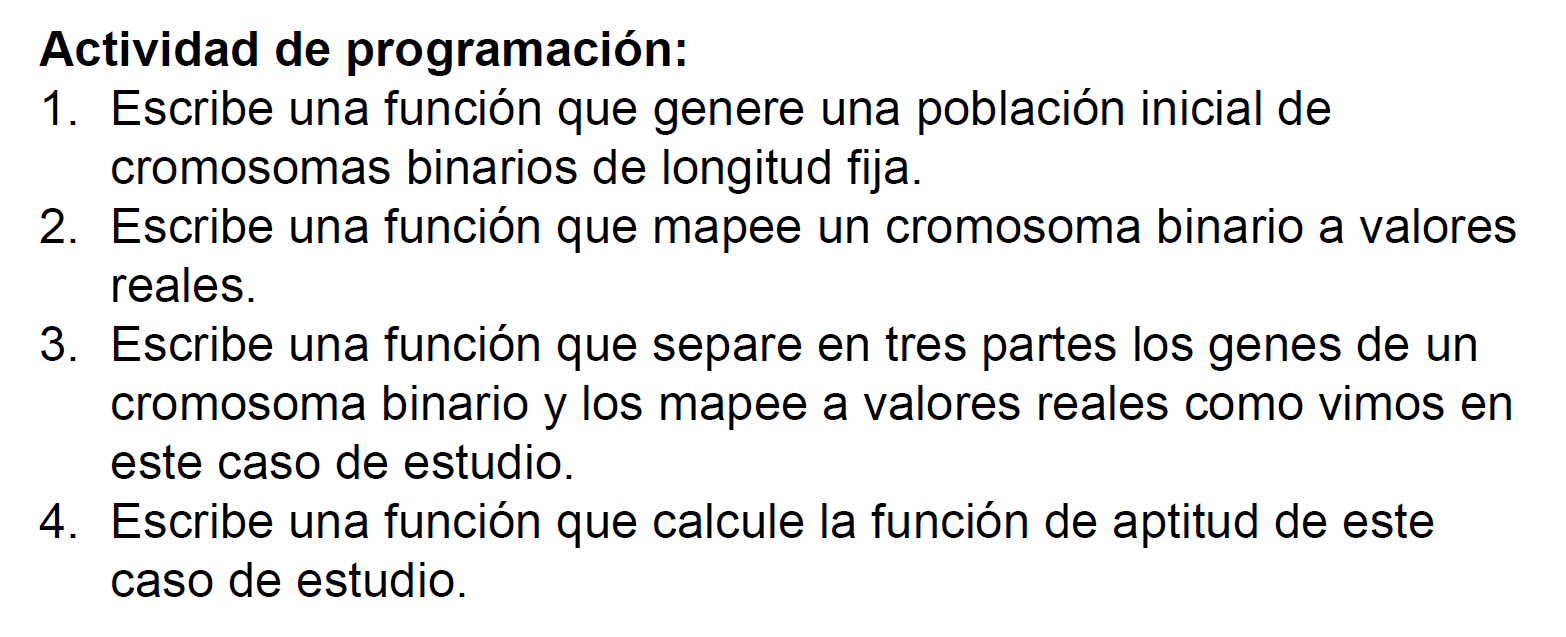

In [1]:
import random
import numpy as np
import pandas as pd

# 1. Escribe una función que genere una población inicial de cromosomas binarios de longitud fija.

In [2]:
def rand_binary():
    """ Genera un cromosoma binario de 9 dígitos.

    Returns:
        _type_: _description_
    """
    p=9
    key1 = ""
    for i in range(p):
        temp = str(random.randint(0, 1))
        key1 += temp
         
    return key1

In [3]:
rand_binary()

'001110111'

In [4]:
def poblacion(len_pobla=4):
    """_summary_

    Args:
        cromosoma (str, optional): _description_. Defaults to ''.
        len_pobla (int, optional): _description_. Defaults to 4.

    Returns:
        _type_: _description_
    """
    return [rand_binary() for x in range(len_pobla)]

In [5]:
poblacion(15)

['100000000',
 '000011011',
 '101010110',
 '011100111',
 '000110110',
 '010011010',
 '101000001',
 '000000001',
 '000110110',
 '110100000',
 '110000001',
 '111100100',
 '000000100',
 '010011010',
 '010000111']

# 2. Escribe una función que mapee un cromosoma binario a valores reales.

In [6]:
def mapeo(bin_num=''):
    num_str = bin_num
    dec_num = 0
    cont = len(num_str) - 1
    for num in range(len(num_str)) :
        if num_str[cont-num] == str(1):
            dec_num += 2**num
    return bin_num,dec_num

In [7]:
dict(mapeo(poblacion(15)[x]) for x in range(len(poblacion(15))))

{'011011111': 223,
 '000111100': 60,
 '111101010': 490,
 '011101110': 238,
 '111111111': 511,
 '001001110': 78,
 '010111010': 186,
 '000000111': 7,
 '111001110': 462,
 '001011111': 95,
 '000101001': 41,
 '011000111': 199,
 '010100001': 161}

# 3. Escribe una función que separe en tres partes los genes de un cromosoma binario y los mapee a valores reales como vimos en este caso de estudio.

In [8]:
def cromosomas(binario):
    print(binario)
    crom = []
    for j in range(0,9,3):
        crom.append(mapeo(binario[j:j+3]))
    return crom

In [9]:
cromosomas(rand_binary())

111011111


[('111', 7), ('011', 3), ('111', 7)]

# 4. Escribe una función que calcule la función de aptitud de este caso de estudio.

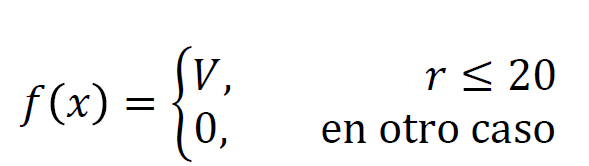

In [10]:
def volumen(x):
    v = 1
    for j in x:
        v *= j
    return v

def R(x):
    list = []
    for j in x:
        list.append(j)
    r = 2*(list[0]*list[1]+list[0]*list[2]+list[1]*list[2])
    return r

def volumen_R(x):
    v = 1
    list = []
    for j in x:
        v *= j
        list.append(j)
    r = 2*(list[0]*list[1]+list[0]*list[2]+list[1]*list[2])
    return v,r

def func(Crom):
    U=5
    L=0
    n = len(Crom)
    
    print(Crom)
    
    fenotipo = []
    for j in Crom:
        map_val = L + ((j[1]/((2**n)-1) * (U-L)))
        fenotipo.append(map_val)
        
    r = volumen_R(fenotipo)[1]
    v = volumen_R(fenotipo)[0]
    
    if r <= 20:
        aptitud = v
    else:
        aptitud = 0
        
    return {'volumen':v, 'r':r,'fenotipo':fenotipo,'aptitud':aptitud}

In [11]:
func(cromosomas(rand_binary()))

111100111
[('111', 7), ('100', 4), ('111', 7)]


{'volumen': 71.42857142857142,
 'r': 107.14285714285714,
 'fenotipo': [5.0, 2.8571428571428568, 5.0],
 'aptitud': 0}

# Ejercicio Caso 1.

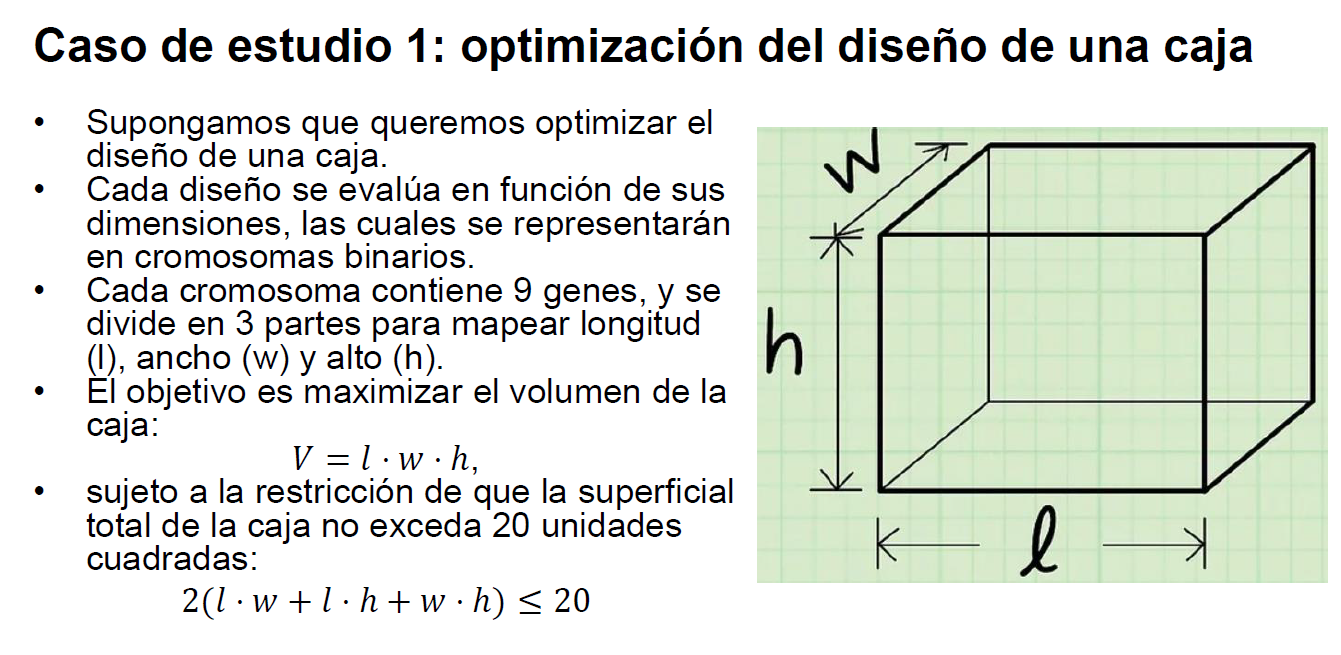
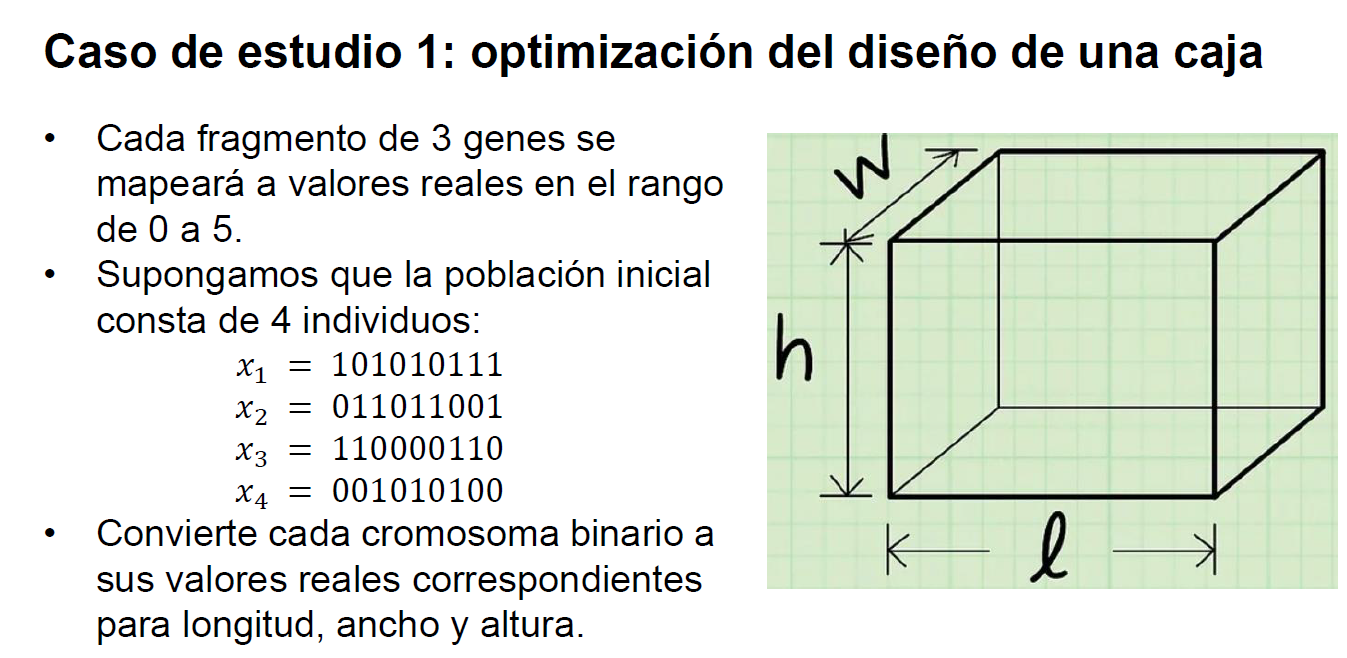

In [12]:
pob_incial = ['101010111','011011001','110000110','001010100']

In [13]:
table = [func(cromosomas(pob_incial[x])) for x in range(len(pob_incial))]

101010111
[('101', 5), ('010', 2), ('111', 7)]
011011001
[('011', 3), ('011', 3), ('001', 1)]
110000110
[('110', 6), ('000', 0), ('110', 6)]
001010100
[('001', 1), ('010', 2), ('100', 4)]


In [14]:
table = pd.DataFrame(table)
table['genotipo'] = pd.Series(pob_incial)

In [15]:
table[['genotipo','fenotipo','aptitud']]

,genotipo,fenotipo,aptitud
0,101010111,"[3.5714285714285716, 1.4285714285714284, 5.0]",0.000000
1,011011001,"[2.142857142857143, 2.142857142857143, 0.71428...",3.279883
2,110000110,"[4.285714285714286, 0.0, 4.285714285714286]",0.000000
3,001010100,"[0.7142857142857142, 1.4285714285714284, 2.857...",2.915452
